# Chapter 3. Introduction to Keras and TensorFlow

# Listing 3.1 All-ones or all-zeros tensors

In [1]:
import tensorflow as tf

In [2]:
x = tf.ones(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [3]:
x = tf.zeros(shape=(2,1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


# Listing 3.2 Random tensors

Tensor of random values drawn from a normal distribution
with mean 0 and standard deviation 1. Equivalent to
np.random.normal(size=(3, 1), loc=0., scale=1.).

In [4]:
x = tf.random.normal(shape=(3,1), mean=0, stddev=1.)
print(x)

tf.Tensor(
[[ 1.9236149 ]
 [ 0.02720579]
 [-2.1180868 ]], shape=(3, 1), dtype=float32)


Tensor of random values drawn from a uniform distribution between 0
and 1. Equivalent to np.random.uniform(size=(3, 1), low=0., high=1.).

In [5]:
x = tf.random.uniform(shape=(3,1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.7103909 ]
 [0.48146415]
 [0.24014413]], shape=(3, 1), dtype=float32)


A significant difference between NumPy arrays and TensorFlow tensors is that Tensor-
Flow tensors aren’t assignable: they’re constant. For instance, in NumPy, you can do
the following.

#### Listing 3.3 NumPy arrays are assignable

In [6]:
import numpy as np

x = np.ones(shape=(2,2))
print(x)

x[0,0] = 0
print(x)

[[1. 1.]
 [1. 1.]]
[[0. 1.]
 [1. 1.]]


Try to do the same thing in TensorFlow, and you will get an error: “EagerTensor object
does not support item assignment.”

#### Listing 3.4 TensorFlow tensors are not assignable

In [7]:
# x = tf.ones(shape=(2,2))
# x[0, 0] = 0.  # This will fail, as a tensor isn’t assignable

Note:  To train a model, we’ll need to update its state, which is a set of tensors. If tensors
aren’t assignable, how do we do it? That’s where variables come in. tf.Variable is the
class meant to manage modifiable state in TensorFlow.

#### Listing 3.5 Creating a TensorFlow variable

In [8]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.71926683],
       [ 0.29119506],
       [-0.6736136 ]], dtype=float32)>


The state of a variable can be modified via its assign method, as follows.

#### Listing 3.6 Assigning a value to a TensorFlow variable

In [9]:
v.assign(tf.ones((3,1))) # It also works for a subset of the coefficients

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

#### Listing 3.7 Assigning a value to a subset of a TensorFlow variable

In [10]:
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

Similarly, assign_add() and assign_sub() are efficient equivalents of += and -=, as
shown next.

#### Listing 3.8 Using assign_add() 

In [11]:
v.assign_add(tf.ones((3,1)))


<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

# 3.5.2 Tensor operations: Doing math in TensorFlow

Just like NumPy, TensorFlow offers a large collection of tensor operations to express
mathematical formulas.

#### Listing 3.9 A few basic math operations

Importantly, each of the preceding operations gets executed on the fly: at any point,
you can print what the current result is, just like in NumPy. We call this eager execution.

In [12]:
a = tf.ones((2,2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

In [13]:
print(a)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [14]:
print(b)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [15]:
print(c)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [16]:
print(d)

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)


In [17]:
print(e)

tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


# 3.5.4 An end-to-end example: A linear classifier in pure TensorFlow

In [18]:
num_sample_per_class = 1000

negative_samples = np.random.multivariate_normal(mean=[0,3],
                                                 cov = [[1,0.5],[0.5,1]],
                                                 size= num_sample_per_class)

posative_sample = np.random.multivariate_normal(mean = [3,0],
                                                cov = [[1,0.5],[0.5,1]],
                                                size = num_sample_per_class)



Listing 3.14 Stacking the two classes into an array with shape (2000, 2)

In [19]:
inputs = np.vstack((negative_samples, posative_sample)).astype(np.float32)

Listing 3.15 Generating the corresponding targets (0 and 1)

In [20]:
targets = np.vstack((np.zeros((num_sample_per_class, 1),dtype="float32"),
                     np.ones((num_sample_per_class, 1), dtype="float32")))

Listing 3.16 Plotting the two point classes (see figure 3.6)

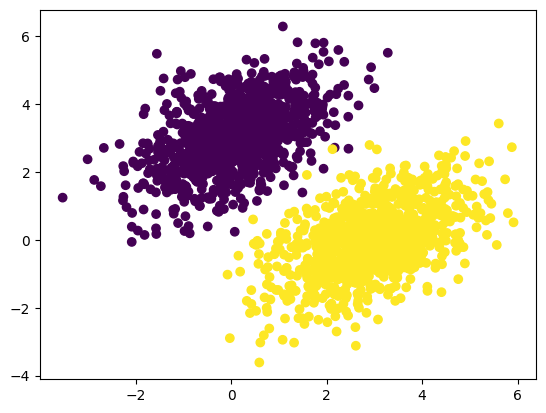

In [21]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

Listing 3.17 Creating the linear classifier variables

In [22]:
input_dim = 2
output_dim = 1

w = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

Listing 3.18 The forward pass function

In [23]:
def model(inputs):
  return tf.matmul(inputs, w) + b

Listing 3.19 The mean squared error loss function

In [24]:
def square_loss(targets, predictions):
  pre_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(pre_sample_losses)

Next is the training step, which receives some training data and updates the weights W
and b so as to minimize the loss on the data.

Listing 3.20 The training step function

In [25]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  grad_loss_wrt_w, grad_loss_wrt_b = tape.gradient(loss, [w,b])
  w.assign_sub(grad_loss_wrt_w * learning_rate)
  b.assign_sub(grad_loss_wrt_b, learning_rate)
  return loss

For simplicity, we’ll do batch training instead of mini-batch training: we’ll run each training
step (gradient computation and weight update) for all the data, rather than iterate over
the data in small batches. On one hand, this means that each training step will take
much longer to run, since we’ll compute the forward pass and the gradients for 2,000
samples at once. On the other hand, each gradient update will be much more effective
at reducing the loss on the training data, since it will encompass information from all
training samples instead of, say, only 128 random samples. As a result, we will need many
fewer steps of training, and we should use a larger learning rate than we would typically
use for mini-batch training (we’ll use learning_rate = 0.1, defined in listing 3.20).

Listing 3.21 The batch training loop

In [26]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 7.0284
Loss at step 1: 20.7952
Loss at step 2: 80.2591
Loss at step 3: 317.4181
Loss at step 4: 1260.4561
Loss at step 5: 5008.5698
Loss at step 6: 19904.3203
Loss at step 7: 79102.3594
Loss at step 8: 314364.1562
Loss at step 9: 1249328.0000
Loss at step 10: 4965012.0000
Loss at step 11: 19731664.0000
Loss at step 12: 78416512.0000
Loss at step 13: 311638496.0000
Loss at step 14: 1238496768.0000
Loss at step 15: 4921963008.0000
Loss at step 16: 19560599552.0000
Loss at step 17: 77736656896.0000
Loss at step 18: 308936802304.0000
Loss at step 19: 1227758764032.0000
Loss at step 20: 4879294136320.0000
Loss at step 21: 19391026561024.0000
Loss at step 22: 77062677200896.0000
Loss at step 23: 306258179522560.0000
Loss at step 24: 1217114006355968.0000
Loss at step 25: 4836987873787904.0000
Loss at step 26: 19222892784910336.0000
Loss at step 27: 76394471624802304.0000
Loss at step 28: 303602785658601472.0000
Loss at step 29: 1206562278879526912.0000
Loss at step 30: 479505

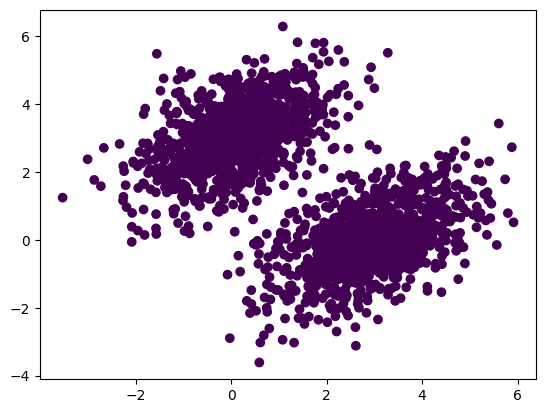

In [27]:
predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] > 0.5)
plt.show()

Let’s plot this line

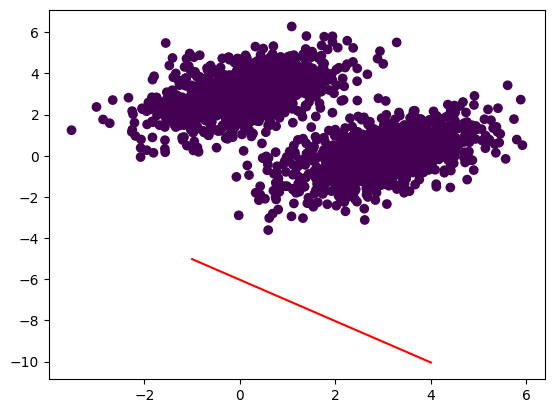

In [28]:
x = np.linspace(-1, 4, 100)
y = -w[0] / w[1] * x + (0.5 - b) / w[1]

plt.plot(x,y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

#### 3.6.3 The “compile” step: Configuring the learning process